In [1]:
#importation des libréries nécessaires
import numpy as np
import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point,Polygon
from pandas_profiling import ProfileReport
from sklearn.cluster import KMeans
import plotly.express as px
from sklearn.model_selection import train_test_split
#importation de DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix
#Importaion du StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics


In [3]:
#Chargement Des Données
df = pd.read_excel('dataset/Telco_customer_churn.csv.xlsx')

In [4]:
#Cette méthode retourne des informations sur une DataFrame 
#(dtypes d'index et de colonne, les valeurs non nulles et l'utilisation de la mémoire)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [5]:
#Affichages des colonnes
df.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')

In [6]:
#Charger une résumé des diffrentes variables dans notre "DataFrame"
profile = ProfileReport(df, title='Pandas Profiling Report', html={'style':{'full_width':True}})

In [6]:
profile

# Data Clean

In [7]:
#consulter les valeurs manquantes
df['Churn Reason'].isnull().sum()

5174

In [8]:
#consulter l'occurence de chaque valeur
df["Churn Reason"].value_counts()

Attitude of support person                   192
Competitor offered higher download speeds    189
Competitor offered more data                 162
Don't know                                   154
Competitor made better offer                 140
Attitude of service provider                 135
Competitor had better devices                130
Network reliability                          103
Product dissatisfaction                      102
Price too high                                98
Service dissatisfaction                       89
Lack of self-service on Website               88
Extra data charges                            57
Moved                                         53
Lack of affordable download/upload speed      44
Long distance charges                         44
Limited range of services                     44
Poor expertise of phone support               20
Poor expertise of online support              19
Deceased                                       6
Name: Churn Reason, 

In [9]:
# Remplacer la valeur manquante par le mode (la valeur la plus fréquente)
df['Churn Reason'] = df['Churn Reason'].fillna(df['Churn Reason'].mode()[0])

In [10]:
#Consulter le type de chaque variable
df.dtypes

CustomerID            object
Count                  int64
Country               object
State                 object
City                  object
Zip Code               int64
Lat Long              object
Latitude             float64
Longitude            float64
Gender                object
Senior Citizen        object
Partner               object
Dependents            object
Tenure Months          int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges         object
Churn Label           object
Churn Value            int64
Churn Score            int64
CLTV                   int64
Churn Reason          object
dtype: object

In [11]:
##### Découvrir les cases vides de la colonne TotalCharges
df["Total Charges"][df['Total Charges']==' '].count()

11

In [12]:
#Remplacer les 11 espaces de valeurs manquantes par nan
df["Total Charges"] = df["Total Charges"].replace(' ',np.nan)

In [13]:
#Supprimer les valeurs manquantes 
df.dropna(inplace = True);

In [14]:
#affiche les nombre de lignes après la suppresion des valeurs manquantes
df.shape[0]

7032

In [15]:
#Changer le type de la variable TotalCharges
df['Total Charges']=df['Total Charges'].astype('float64') 

In [16]:
#afficher le type de la variable TotalCharges
df["Total Charges"].dtypes

dtype('float64')

# Data Understanding

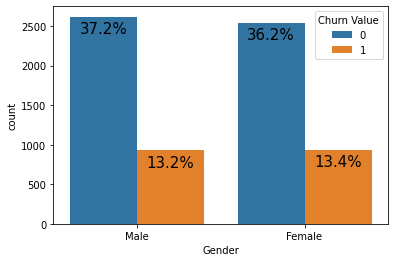

In [17]:
#représentation graphique des clients en fonction de leurs gender avec la bibliotheque seaborn
splot=sns.countplot(x="Gender",hue="Churn Value",data=df);

#affichage des poucentages sur la figure
for p in splot.patches: #parcourir les bâtons 
    splot.annotate('{:.1f}%'.format(p.get_height()/df.shape[0]*100), #cacule des pourcentages
                   (p.get_x() + p.get_width() / 2., p.get_height()), #Position
                   #saisir les parametres 
                   ha = 'center', va = 'center', 
                   size=15,
                   xytext = (0, -12), 
                   textcoords = 'offset points')
#enrigistrement de la figure 
splot.figure.savefig('figure2.png', dpi = 400)

In [18]:
#Selection des variables catégorielles
Categorial_columns = [col for col in df.columns if col not in ("CustomerID","Count","Monthly Charges","Country","State",'Zip Code',
       'Lat Long', 'Latitude', 'Longitude',"Total Charges","Tenure Months","Churn Score","Churn Value","CLTV")]

In [19]:
#Pour éviter la redondances il faut considerer "No internet service"  comme "no"
for col in Categorial_columns:
    if col in ("Online Security","Multiple Lines","Online Backup","Device Protection","Tech Support","Streaming TV","Streaming Movies"):
        df[col] = df[col].replace({'No internet service':'No'})
        df[col] = df[col].replace({'No phone service':'No'})

In [20]:
#Afficher les modalités de chaques varaibles
for col in Categorial_columns:
    print("{} : {}".format(col,df[col].unique()))

City : ['Los Angeles' 'Beverly Hills' 'Huntington Park' ... 'Tulelake'
 'Olympic Valley' 'Redcrest']
Gender : ['Male' 'Female']
Senior Citizen : ['No' 'Yes']
Partner : ['No' 'Yes']
Dependents : ['No' 'Yes']
Phone Service : ['Yes' 'No']
Multiple Lines : ['No' 'Yes']
Internet Service : ['DSL' 'Fiber optic' 'No']
Online Security : ['Yes' 'No']
Online Backup : ['Yes' 'No']
Device Protection : ['No' 'Yes']
Tech Support : ['No' 'Yes']
Streaming TV : ['No' 'Yes']
Streaming Movies : ['No' 'Yes']
Contract : ['Month-to-month' 'Two year' 'One year']
Paperless Billing : ['Yes' 'No']
Payment Method : ['Mailed check' 'Electronic check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn Label : ['Yes' 'No']
Churn Reason : ['Competitor made better offer' 'Moved' 'Competitor had better devices'
 'Competitor offered higher download speeds'
 'Competitor offered more data' 'Price too high' 'Product dissatisfaction'
 'Service dissatisfaction' 'Lack of self-service on Website'
 'Network reliabili

In [21]:
#Importer la map de California
plz_shape_df = gpd.read_file('state/tl_2016_06_cousub/tl_2016_06_cousub.shp', dtype={'plz': str})

In [22]:
# Obtenez lat et lng des principales villes de Californie.
top_cities = {
    'Los Angeles': ( -118.244,+34.052), 
    'San Diego': (-117.165,+32.716),
    'San Jose  ': (-121.895,+37.339),
    'San Francisco': (-122.419,+37.775),
    'Fresno': (-119.772,+36.748 ),
    'Sacramento': (-121.494,38.582),
    'Long Beach': (-118.189,33.767),
}

- Distrubition des clients ("Churned" et "Not Churned" ) dans la ville de Californie

/home/ayadi/anaconda3/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


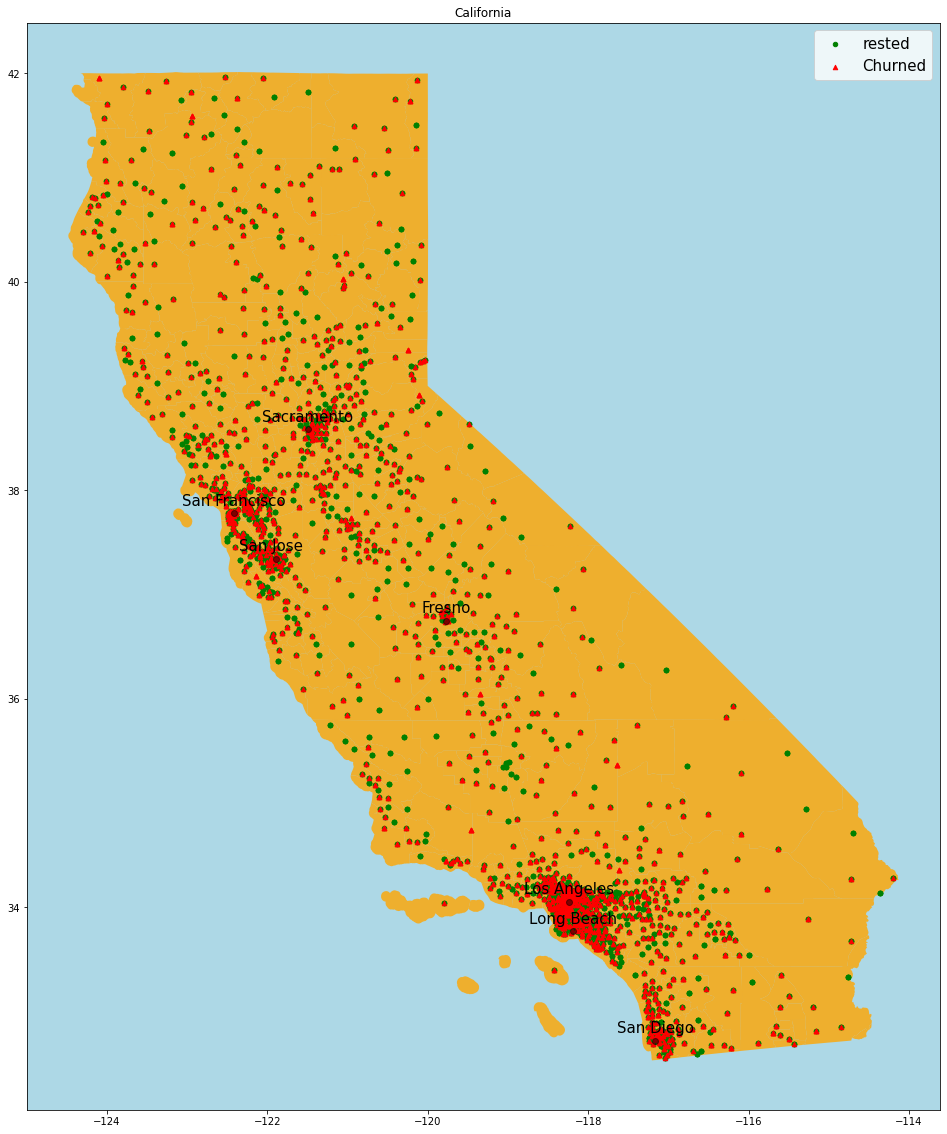

In [23]:
# Personnaliser les tracés Matplotlib à l'aide de rcParams
plt.rcParams['figure.figsize'] = [20, 20]
fig, ax = plt.subplots()
plz_shape_df.plot(ax=ax, color='orange', alpha=0.8);


geometry = [Point(xy) for xy in zip( df["Longitude"], df["Latitude"])]
crs = {'init': 'epsg:4326'}
geo_df = gpd.GeoDataFrame(df,crs = crs,geometry = geometry)

#parametres et Affichage de la figure
geo_df[geo_df["Churn Value"] == 0].plot(ax = ax, markersize = 20,color="green",marker = "o", label = "rested")
geo_df[geo_df["Churn Value"] == 1].plot(ax = ax, markersize = 20,color="red",marker = "^", label = "Churned")
plt.legend(prop = {'size': 15})

# Plot cities. 
for c in top_cities.keys():
    # Plot city name.
    ax.text(
        x=top_cities[c][0], 
        # Add small shift to avoid overlap with point.
        y=top_cities[c][1] + 0.08, 
        s=c, 
        fontsize=15,
        ha='center', 
    )
    # Plot city location centroid.
    ax.plot(
        top_cities[c][0], 
        top_cities[c][1], 
        marker='o',
        c='black', 
        alpha=0.5
    )

ax.set(
    title='California', 
    aspect=1.3, 
    facecolor='lightblue'
);



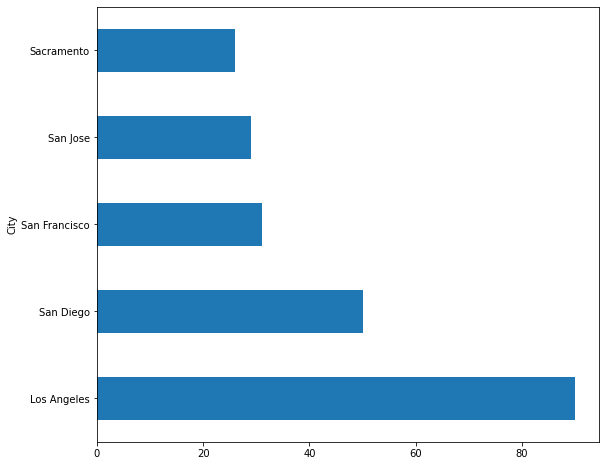

In [24]:
#Ordonner le nombre des clients "churned" par la variable "City"
plt.figure(figsize=(9,8)) #fixer la taille du figure
df.groupby("City")["Churn Value"].sum().sort_values(ascending=False)[:5].plot.barh();

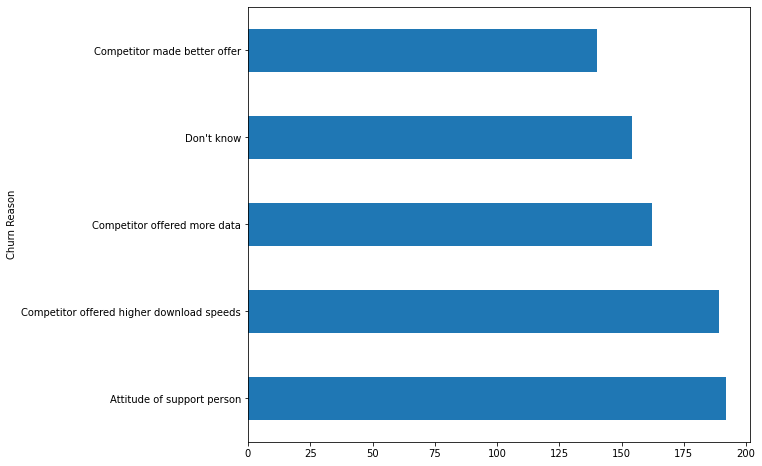

In [25]:
#Ordonner le nombre des clients "churned" par la variable "Churn Reason"
plt.figure(figsize=(9,8)) #fixer la taille du figure
df.groupby("Churn Reason")["Churn Value"].sum().sort_values(ascending=False)[:5].plot.barh();

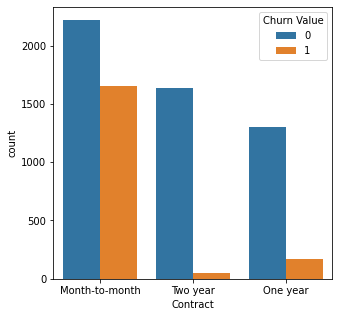

In [26]:
# Le type du Contract d'un client e a-t-il un rapport avec son taux de quitter l'entreprise ?
plt.figure(figsize=(5,5)) #fixer la taille du figure
sns.countplot(x="Contract",hue="Churn Value",data=df);
# si le type de contract est "Month-to-month" , les clients ont plus de chances de quitter l'entreprise

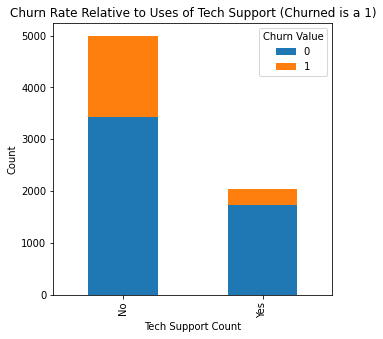

In [27]:
# Explorer la relation entre "Tech Support" et "Churn". 

# Barre empilée de Tech Support et Churn.
tech_support_churn = pd.crosstab(df['Tech Support'], df['Churn Value'])
tech_support_churn.plot(kind = 'bar', stacked = True,figsize=(5,5))
plt.ylabel('Count')
plt.xlabel('Tech Support Count')
plt.title('Churn Rate Relative to Uses of Tech Support (Churned is a 1)')
plt.show()
# Nous pouvons voir que les non-churners utilisent le "Tech Support" plus souvent que les clients qui "churen".

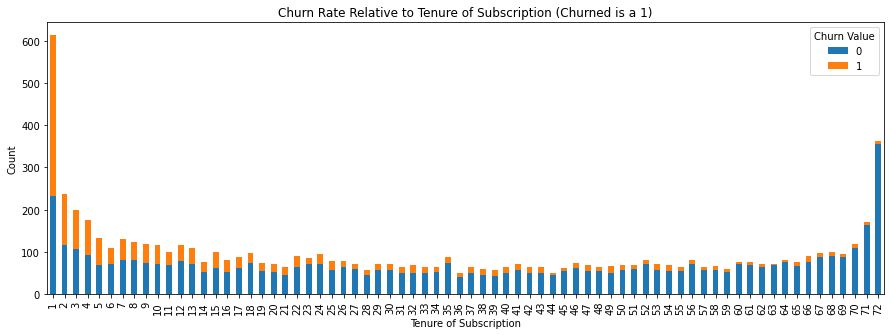

In [28]:
# Le taux de Churn par rapport au 'tenure Months'.
# Barre empilée de 'tenure Months' et churn.

tenure_churn = pd.crosstab(df['Tenure Months'], df['Churn Value'])
tenure_churn.plot(kind = 'bar', stacked = True,figsize=(15,5))

plt.ylabel('Count')
plt.xlabel('Tenure of Subscription')
plt.title('Churn Rate Relative to Tenure of Subscription (Churned is a 1)')
plt.show()
# Nous pouvons clairement voir que plus un client reste longtemps abonné, moins il est susceptible de changer d'abonnement !

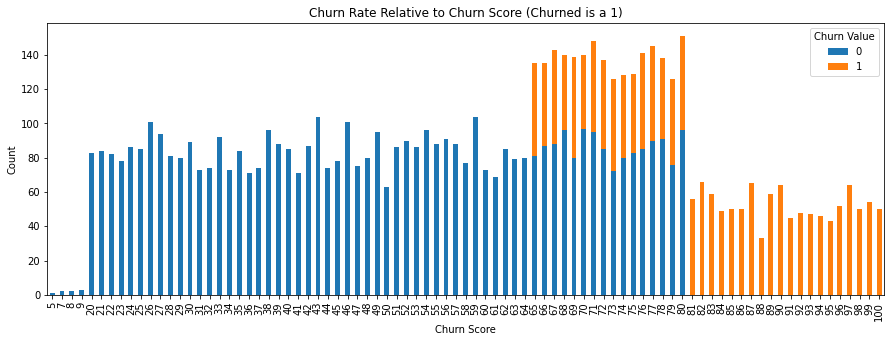

In [29]:
# Le taux de Churn par rapport au 'Churn Score'.
# Barre empilée de 'Churn Score' and churn.

tenure_churn = pd.crosstab(df['Churn Score'], df['Churn Value'])
tenure_churn.plot(kind = 'bar', stacked = True,figsize=(15,5))

plt.ylabel('Count')
plt.xlabel('Churn Score')
plt.title('Churn Rate Relative to Churn Score (Churned is a 1)')
plt.show()
# Nous pouvons clairement voir que plus un client possède un "Churn Score" important plus il risque de quitter l'entreprise

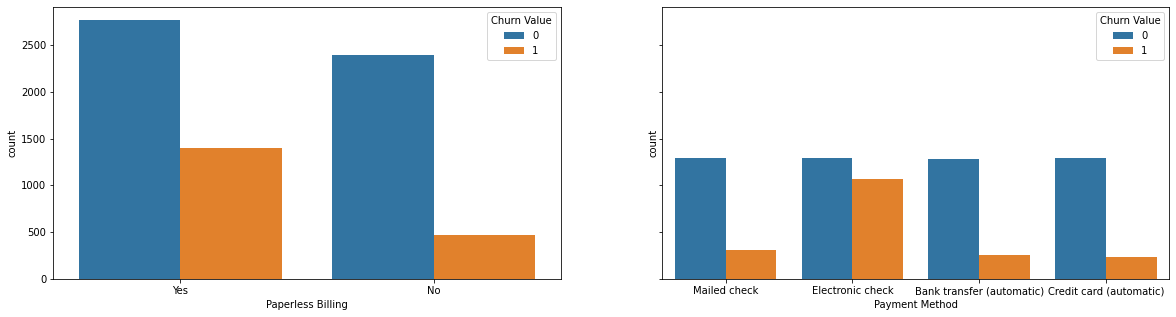

In [30]:
# La façon dont un client paie a-t-elle un rapport avec son taux de "Churn" ?
_, axes = plt.subplots(1, 2, sharey=True, figsize=(20, 5)) 
sns.countplot(x='Paperless Billing', hue='Churn Value',
              data=df, ax=axes[0]);
sns.countplot(x='Payment Method', hue='Churn Value',
              data=df, ax=axes[1]);
# Nous pouvons voir que les clients qui utilisent la facturation électronique sont beaucoup plus enclins à abandonner 
# On peut voir que les clients qui ont le mode de paiement  (electronic check) sont beaucoup plus susceptibles de quitter

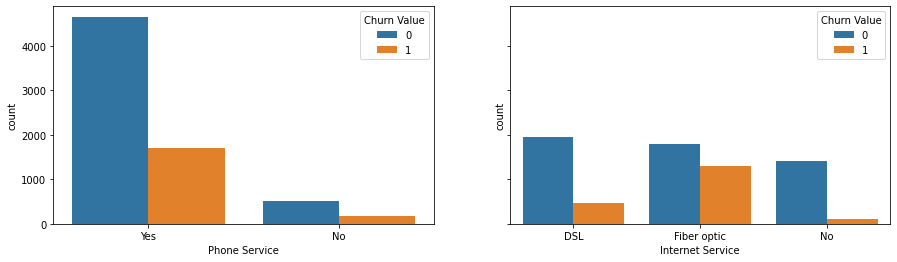

In [31]:
# Voyez si les autres produits de cette entreprise ont un rapport avec leur Churn.
_, axes = plt.subplots(1, 2, sharey=True, figsize=(15, 4)) 
sns.countplot(x='Phone Service', hue='Churn Value',
              data=df, ax=axes[0]);
sns.countplot(x='Internet Service', hue='Churn Value',
              data=df, ax=axes[1]);
# S'ils n'ont pas de "Phone Service", ils sont plus susceptibles de se désabonner.
# S'ils n'ont pas de service Internet, ils ont plus de chances de rester. 
# Les clients ayant le plus haut niveau de service Internet sont les plus susceptibles de changer .

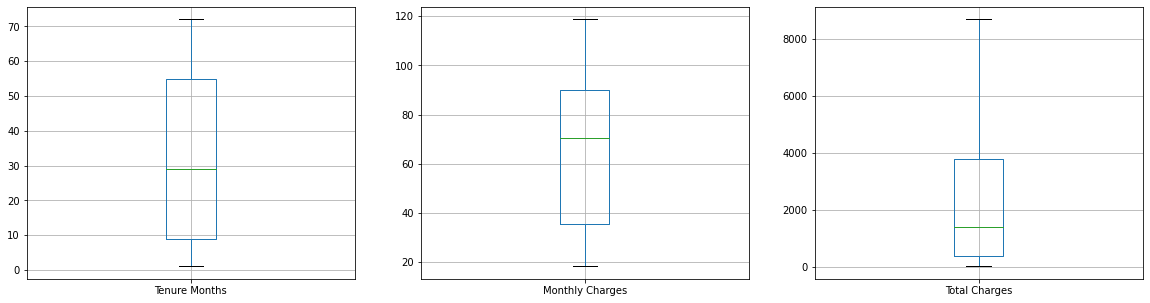

In [32]:
#Fixer la taille et le nombre du  la figure
f, axes = plt.subplots( ncols=3, figsize=(20, 5))
df.boxplot(column=["Tenure Months"],ax = axes[0]);
df.boxplot(column=['Monthly Charges'],ax = axes[1])
df.boxplot(column=["Total Charges"],ax = axes[2]);
plt.savefig('figure6.png', dpi = 400)


- Le boxplot ne présente aucune valeur abérante dans la distribution.

## Data Preprocessing

In [33]:
#Supprimer les colonnes non nécessaire de la table ( pour la prédection)
df = df.drop(columns = ['CustomerID','Count','Country','State','Churn Label'])

In [34]:
df

City  Zip Code                Lat Long   Latitude   Longitude  \
0      Los Angeles     90003  33.964131, -118.272783  33.964131 -118.272783   
1      Los Angeles     90005   34.059281, -118.30742  34.059281 -118.307420   
2      Los Angeles     90006  34.048013, -118.293953  34.048013 -118.293953   
3      Los Angeles     90010  34.062125, -118.315709  34.062125 -118.315709   
4      Los Angeles     90015  34.039224, -118.266293  34.039224 -118.266293   
...            ...       ...                     ...        ...         ...   
7038       Landers     92285  34.341737, -116.539416  34.341737 -116.539416   
7039      Adelanto     92301  34.667815, -117.536183  34.667815 -117.536183   
7040         Amboy     92304  34.559882, -115.637164  34.559882 -115.637164   
7041  Angelus Oaks     92305     34.1678, -116.86433  34.167800 -116.864330   
7042  Apple Valley     92308  34.424926, -117.184503  34.424926 -117.184503   

      Gender Senior Citizen Partner Dependents  Tenure Months  ...  \
0       Male             No      No         No              2  ...   
1     Female             No      No        Yes              2  ...   
2     Female             No      No        Yes              8  ...   
3     Female             No     Yes        Yes             28  ...   
4       Male             No      No        Yes             49  ...   
...      ...            ...     ...        ...            ...  ...   
7038  Female             No      No         No             72  ...   
7039    Male             No     Yes        Yes             24  ...   
7040  Female             No     Yes        Yes             72  ...   
7041  Female             No     Yes        Yes             11  ...   
7042    Male             No      No         No             66  ...   

            Contract Paperless Billing             Payment Method  \
0     Month-to-month               Yes               Mailed check   
1     Month-to-month               Yes           Electronic check   
2     Month-to-month               Yes           Electronic check   
3     Month-to-month               Yes           Electronic check   
4     Month-to-month               Yes  Bank transfer (automatic)   
...              ...               ...                        ...   
7038        Two year               Yes  Bank transfer (automatic)   
7039        One year               Yes               Mailed check   
7040        One year               Yes    Credit card (automatic)   
7041  Month-to-month               Yes           Electronic check   
7042        Two year               Yes  Bank transfer (automatic)   

     Monthly Charges Total Charges Churn Value Churn Score  CLTV  \
0              53.85        108.15           1          86  3239   
1              70.70        151.65           1          67  2701   
2              99.65        820.50           1          86  5372   
3             104.80       3046.05           1          84  5003   
4             103.70       5036.30           1          89  5340   
...              ...           ...         ...         ...   ...   
7038           21.15       1419.40           0          45  5306   
7039           84.80       1990.50           0          59  2140   
7040          103.20       7362.90           0          71  5560   
7041           29.60        346.45           0          59  2793   
7042          105.65       6844.50           0          38  5097   

                       Churn Reason                     geometry  
0      Competitor made better offer  POINT (-118.27278 33.96413)  
1                             Moved  POINT (-118.30742 34.05928)  
2                             Moved  POINT (-118.29395 34.04801)  
3                             Moved  POINT (-118.31571 34.06213)  
4     Competitor had better devices  POINT (-118.26629 34.03922)  
...                             ...                          ...  
7038     Attitude of support person  POINT (-116.53942 34.34174)  
7039     Attitude of support person  POINT

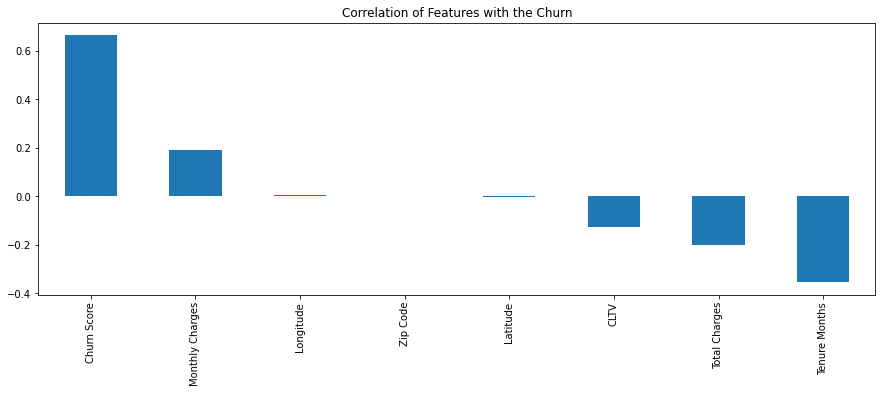

In [35]:
#Représentation graphique la corrélation de chaque variable avec la variable cible "Churn"
plt.figure(figsize=(15,5))
plt.title("Correlation of Features with the Churn")
df.corr()['Churn Value'].drop(index='Churn Value').sort_values(ascending=False).plot(kind='bar')
plt.show()

In [36]:
#Supprimer les colonnes faiblement corréllées avec la variable cible
df = df.drop(columns = ['Zip Code','Lat Long','Latitude','Longitude','City'])

In [37]:
#Selection des variables catégorielles
df.select_dtypes(include=[object]).columns

Index(['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Churn Reason'],
      dtype='object')

In [38]:
df.columns

Index(['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Tenure Months',
       'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charges', 'Total Charges', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason', 'geometry'],
      dtype='object')

In [39]:
#réindixer la dataframe
df=df[['Gender', 'Senior Citizen', 'Partner', 'Dependents',
       'Tenure Months', 'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charges', 'Total Charges',
       'Churn Score', 'CLTV', 'Churn Reason','Churn Value']]

In [40]:
#Partition de la dataframe en une variable à expliquer et des variable explicatives
X= df.iloc[:,0:22]
y= df.iloc[:,22]

In [41]:
#Encodage des varaibles catégorielles avec factorize si on a deux modalités ou get_dummies  pour plus que deux
for col in X.select_dtypes(include=[object]).columns:
    if X[col].nunique() == 2:
        X[col], _ = pd.factorize(X[col])
    else:
        X = pd.get_dummies(X, columns=[col],drop_first=True)

# Modélisation

In [42]:
#Diviser les données (70% Apprentissage et 30% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)

In [43]:

#initiation de DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=0,criterion='gini')

In [44]:
#Trainer le modèle à l'aide des données d'apprentissage
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

# Evaluation

In [45]:
print('Score sur les des données d''apprentissage :', dt.score(X_train, y_train))
print('Score sur les des données de  test  :', dt.score(X_test, y_test))

Score sur les des données dapprentissage : 1.0
Score sur les des données de  test  : 0.9781990521327014


In [46]:
y_pred = dt.predict(X_test)
print(classification_report(y_test, y_pred, digits=8 ))

              precision    recall  f1-score   support

           0  0.98522800 0.98522800 0.98522800      1557
           1  0.95840868 0.95840868 0.95840868       553

    accuracy                      0.97819905      2110
   macro avg  0.97181834 0.97181834 0.97181834      2110
weighted avg  0.97819905 0.97819905 0.97819905      2110



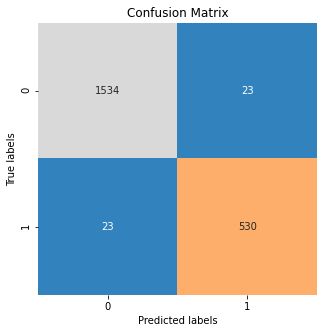

In [47]:
fig, ax = plt.subplots(figsize=(5,5))         # Sample figsize in inches
conf_mtx = confusion_matrix(y_test,y_pred,labels=[0,1])
sns.heatmap(conf_mtx,annot=True,cmap='tab20c',cbar = False,fmt = "g")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix');
plt.savefig('figure11.png', dpi = 400)


# Clustring 

In [71]:
dfclustring=df

In [72]:
col=dfclustring.columns

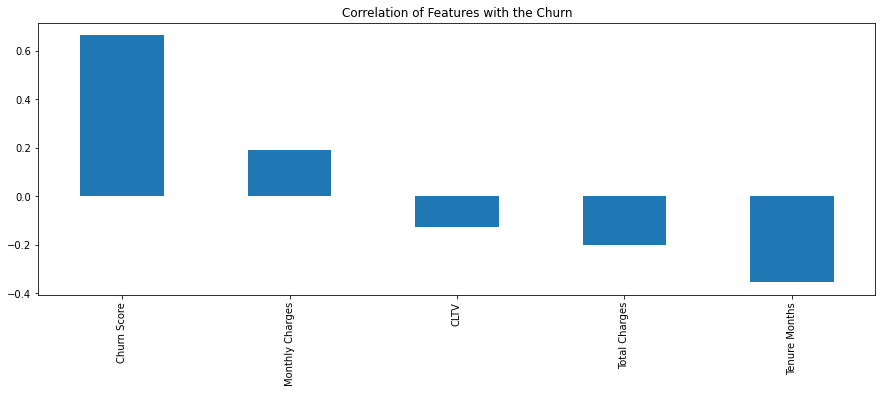

In [73]:
#Représentation graphique la corrélation de chaque variable avec la variable cible "Churn"
plt.figure(figsize=(15,5))
plt.title("Correlation of Features with the Churn")
col=dfclustring.corr()['Churn Value'].drop(index='Churn Value').sort_values(ascending=False).plot(kind='bar')
plt.show()

In [74]:
#les variables les plus importants Tenure Months,Monthly Charges et Churn Score
dfclustring=dfclustring[["Tenure Months","Monthly Charges","Churn Score"]]

In [75]:
#instanciation de l'objet
scaler = MinMaxScaler()
#transformation – centrage-réduction
scaler.fit(dfclustring)
dfclustring = scaler.transform(dfclustring)


In [76]:
# Transformation de dfclustring vers une dataframe
dfclustring = pd.DataFrame(data = dfclustring, columns=["Tenure Months","Monthly Charges","Churn Score"], index=df.index)

In [1]:
dfclustring

NameError: name 'dfclustring' is not defined

[0.35800576 0.33136476 0.34142057 0.34576878 0.32476362 0.3191887
 0.31478108 0.30497618 0.30870448]


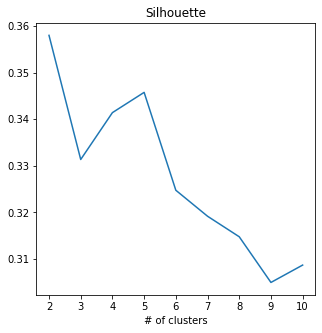

In [77]:
#utilisation de la métrique "silhouette" 
#faire varier le nombre de clusters de 2 à 10 
res = np.arange(9,dtype="double") 
for k in np.arange(9): 
  km = KMeans(n_clusters=k+2) 
  km.fit(dfclustring) 
  res[k] = metrics.silhouette_score(dfclustring,km.labels_)
print(res)
#graphique 
plt.figure(figsize=(5, 5))  
plt.title("Silhouette") 
plt.xlabel("# of clusters") 
plt.plot(np.arange(2,11,1),res) 
plt.show()

Maintenant, avec ce figure, le nombre optimal de clusters devrait être 3

In [78]:
# k-means algorithm
k = 3
#Inisiation de l'objet Kmean et entrainer les données 
kmeans = KMeans(n_clusters=k,init='random',max_iter=1000,random_state=0).fit(dfclustring)
#Ajouter un variable "Cluster" qui détermine le Cluster de chaque individus
dfclustring['Cluster'] = kmeans.labels_
#Changer le type de la variable Cluster en "Category"
dfclustring['Cluster'] = dfclustring['Cluster'].astype('category')

In [79]:
#Affichage des 5 lignes de la nouvelle dataframe
dfclustring.head()

Tenure Months  Monthly Charges  Churn Score Cluster
0       0.014085         0.354229     0.852632       1
1       0.014085         0.521891     0.652632       1
2       0.098592         0.809950     0.852632       1
3       0.380282         0.861194     0.831579       1
4       0.676056         0.850249     0.884211       2

In [56]:
kmeans

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=1000,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [80]:
# Représentation des 3 Clusters dans un plan 3D en fonction des 3 variables (x='Tenure Months', y='Monthly Charges', z='Churn Score')
fig = px.scatter_3d(dfclustring, x='Tenure Months', y='Monthly Charges', z='Churn Score',
              color='Cluster')
fig.show()

In [81]:
#Définir la taille de chaque Cluster 
cluster_size = dfclustring.groupby(['Cluster'], as_index=False).size()

In [82]:
#Affichage
cluster_size

Cluster  size
0       0  2097
1       1  2350
2       2  2585

In [83]:
# Tronsformation dans une data frame
dfcluster = pd.DataFrame(data=cluster_size ,columns=['size'])

In [84]:
#Affichage
dfcluster

size
0  2097
1  2350
2  2585

In [85]:
#Ajouter une varibale "Percentage" qui détermine le pourcentage de chaque Cluster
dfcluster['Percentage'] = dfcluster['size'] / sum(dfcluster['size'])

In [86]:
#Affichage
dfcluster

size  Percentage
0  2097    0.298208
1  2350    0.334187
2  2585    0.367605

In [88]:
#Représentation graphique des 3 secteurs
fig = px.pie(dfcluster, values='Percentage', 
             color_discrete_sequence=px.colors.sequential.Bluered, width=800, height=500,
            title='Taille de chaque Cluster')
fig.show()

In [89]:
#Retour aux valeurs initiales des données (sans MinMaxScaler)
dfvalues = scaler.inverse_transform(dfclustring.iloc[:,0:3])

In [90]:
#Affichage
dfvalues

array([[  2.  ,  53.85,  86.  ],
       [  2.  ,  70.7 ,  67.  ],
       [  8.  ,  99.65,  86.  ],
       ...,
       [ 72.  , 103.2 ,  71.  ],
       [ 11.  ,  29.6 ,  59.  ],
       [ 66.  , 105.65,  38.  ]])

In [91]:
#Transforamtion vers une DataFrame
dfvalues = pd.DataFrame(data = dfvalues, columns=["Tenure Months","Monthly Charges","Churn Score"], index=df.index)

In [92]:
#Concatination
dfvalues = pd.concat([dfvalues, dfclustring.iloc[:,3]], axis=1)

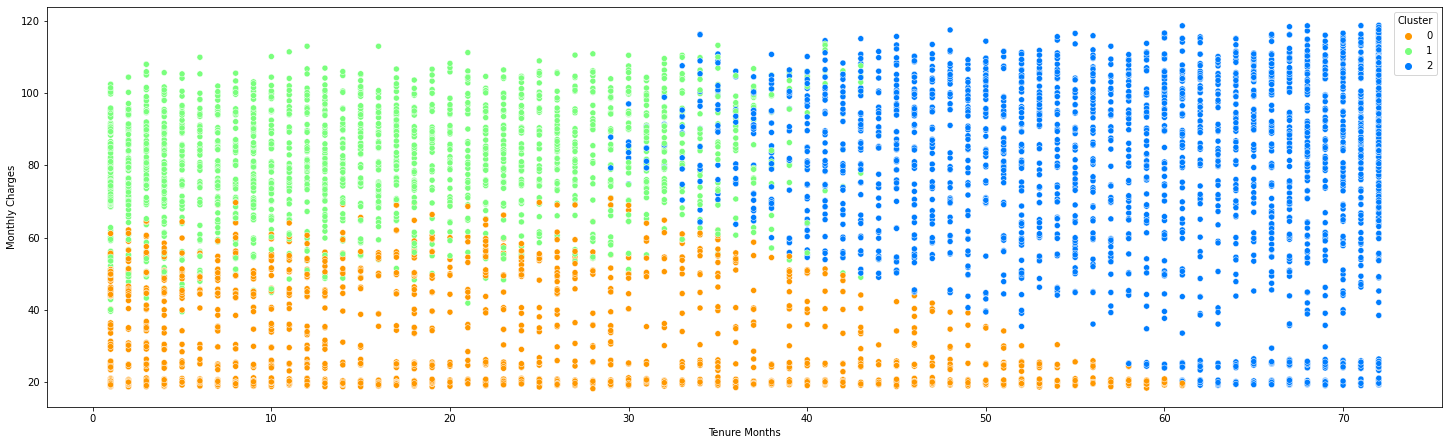

In [93]:
#Représentation graphique des 3 Clustres en fonction de Tenure Months" et "Monthly Charges" 
f = plt.figure(figsize=(25,25))
ax = f.add_subplot(311)
ax = sns.scatterplot(x="Tenure Months", y="Monthly Charges", hue='Cluster', data=dfvalues, palette="jet_r")


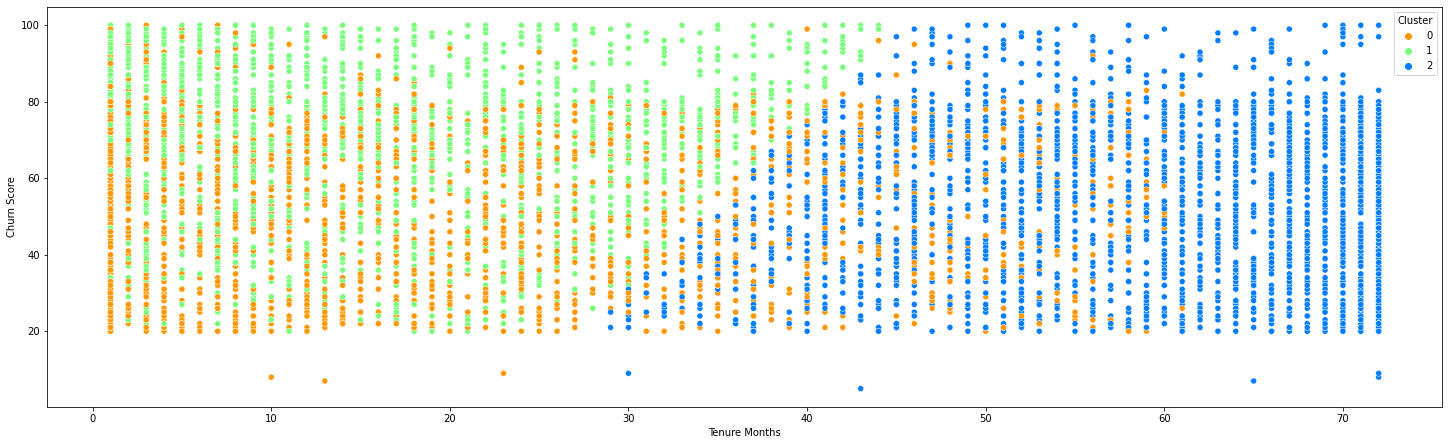

In [94]:
#Représentation graphique des 3 Clustres en fonction de Tenure Months" et "Churn Score" 
f = plt.figure(figsize=(25,25))
ax = f.add_subplot(311)
ax = sns.scatterplot(x="Tenure Months", y="Churn Score", hue='Cluster', data=dfvalues, palette="jet_r")

In [95]:
#Stocker chaque Cluster dans une DataFrame
cluster0 = dfvalues[dfvalues['Cluster']==0]
cluster1 = dfvalues[dfvalues['Cluster']==1]
cluster2 = dfvalues[dfvalues['Cluster']==2]

In [96]:
#Produire un analyse déscrptive du cluster0
cluster0.describe()

Tenure Months  Monthly Charges  Churn Score
count    2097.000000      2097.000000  2097.000000
mean       19.714831        30.327372    52.539819
std        16.869383        13.644840    20.169332
min         1.000000        18.250000     7.000000
25%         4.000000        19.950000    35.000000
50%        15.000000        21.300000    52.000000
75%        32.000000        43.450000    69.000000
max        61.000000        70.900000   100.000000

In [97]:
#Produire un analyse déscrptive du cluster1
cluster1.describe()

Tenure Months  Monthly Charges  Churn Score
count    2350.000000      2350.000000  2350.000000
mean       14.055319        79.507872    70.748511
std        11.434579        15.130307    19.344806
min         1.000000        39.500000    20.000000
25%         4.000000        70.200000    61.000000
50%        11.000000        79.900000    74.000000
75%        23.000000        90.500000    85.000000
max        44.000000       113.600000   100.000000

In [98]:
#Produire un analyse déscrptive du cluster2
cluster2.describe()

Tenure Months  Monthly Charges  Churn Score
count    2585.000000      2585.000000  2585.000000
mean       59.426692        79.389168    52.785687
std        11.056748        27.013960    19.835969
min        29.000000        19.100000     5.000000
25%        51.000000        64.050000    36.000000
50%        62.000000        85.250000    53.000000
75%        70.000000       100.650000    69.000000
max        72.000000       118.750000   100.000000